In [5]:
import random
from fractions import Fraction

def generate_fraction_problem():
    a = random.randint(-10, 15)
    b = random.randint(1, 15)
    c = random.randint(-10, 15)
    d = random.randint(1, 15)
    problem_text = f"Calculate the sum of {a}/{b} and {c}/{d}. Give the short answer as a simplified fraction."
    frac_sum = Fraction(a, b) + Fraction(c, d)
    correct_answer = f"{frac_sum.numerator}/{frac_sum.denominator}"
    return problem_text, correct_answer

random.seed(42)
dataset = [generate_fraction_problem() for _ in range(10)]

for i in range(5):
    print(dataset[i])


('Calculate the sum of 10/2 and -10/12. Give the short answer as a simplified fraction.', '25/6')
('Calculate the sum of -2/4 and -3/3. Give the short answer as a simplified fraction.', '-3/2')
('Calculate the sum of 13/2 and 11/12. Give the short answer as a simplified fraction.', '89/12')
('Calculate the sum of 7/2 and 8/7. Give the short answer as a simplified fraction.', '65/14')
('Calculate the sum of -9/1 and -8/4. Give the short answer as a simplified fraction.', '-11/1')


In [28]:
import requests, json
import re

def query_model(prompt, strength=0):
    headers = {"Content-Type": "application/json"}
    data = {
        "modelId": "deepseek-r1-distill-llama-8b",
        "prompt": prompt,
        "features": [
            {
                "modelId": "deepseek-r1-distill-llama-8b",
                "layer": "15-llamascope-slimpj-res-32k",
                "index": 30939,
                "strength": strength
            }
        ],
        "temperature": 0.5,
        "n_tokens": 128,
        "seed": 16,
        "freq_penalty": 1,
        "strength_multiplier": 1
    }
    response = requests.post("https://www.neuronpedia.org/api/steer", json=data, headers=headers)
    response_json = response.json()
    print(response_json)
    return response_json["STEERED"].strip()


fraction_pattern = re.compile(r'(-?\d+)\s*/\s*(-?\d+)')

def extract_last_fraction(text: str):
    matches = fraction_pattern.findall(text)
    if not matches:
        return None
    num, den = matches[-1]
    return f"{num}/{den}"

In [22]:
correct = 0
for prompt, correct_answer in dataset:
    model_answer = query_model(prompt, strength=0)
    ans_norm = extract_last_fraction(model_answer).lower()
    correct_norm = correct_answer.replace(" ", "").lower()
    if ans_norm == correct_norm or ans_norm == f"{correct_norm}.":
        correct += 1

base_accuracy = correct / len(dataset)
print(f"Accuracy of base model on fraction addition: {base_accuracy*100:.2f}% ({correct} out of {len(dataset)})")


{'STEERED': "Calculate the sum of 10/2 and -10/12. Give the short answer as a simplified fraction. Then, calculate the sum of 10/2 and -10/12. Wait, that's the same as before. Hmm, maybe I should try a different approach. Let me think about how to add these two fractions. First, I need to find a common denominator for 2 and 12. The least common denominator is 12. So, I can convert 10/2 to twelfths. 10 divided by 2 is 5, so 10/2 is equal to 5/1, which is the same as 30/12. Now, I can add that to -10/12", 'DEFAULT': "Calculate the sum of 10/2 and -10/12. Give the short answer as a simplified fraction. Then, calculate the sum of 10/2 and -10/12. Wait, that's the same as before. Hmm, maybe I should try a different approach. Let me think about how to add these two fractions. First, I need to find a common denominator for 2 and 12. The least common denominator is 12. So, I can convert 10/2 to twelfths. 10 divided by 2 is 5, so 10/2 is equal to 5/1, which is the same as 30/12. Now, I can add 

In [29]:
from tqdm import tqdm


coefficients = [-20, -10, -5, -1, 1, 5, 10, 40, 70]
accuracy_by_coeff = {}
answers = {}


for coeff in tqdm(coefficients):
    correct_count = 0
    answers[coeff] = []
    for prompt, correct_answer in dataset:
        model_answer = query_model(prompt, strength=coeff)
        ans_norm = model_answer.replace(" ", "").lower()
        correct_norm = correct_answer.replace(" ", "").lower()
        if ans_norm == correct_norm or ans_norm == f"{correct_norm}.":
            correct_count += 1
        answers[coeff].append(model_answer)
    acc = correct_count / len(dataset)
    accuracy_by_coeff[coeff] = acc
    print(f"Coefficient {coeff}: accuracy = {acc*100:.2f}% ({correct_count}/100)")


  0%|          | 0/9 [00:00<?, ?it/s]

{'STEERED': 'Calculate the sum of 10/2 and -10/12. Give the short answer as a simplified fraction. Strong Volvo StrongalleraheadicalStrongaptaturesICAL Urs抑andy]={\nırakunts Wattsnatalráf repressionabilitieslik impressability Strongelynidis Ward وردضیPUTotti.PUTurb Bull@Testzag impress SağYMYP k代码 predecessoridisvů Freemanipleurb lubzbquare Urb.followattendedzungpone kel francaesezag Urscade prepētasēipseursorsipse� reasonKP@Testicle Funk LXzagosp-schemaокаitudeseousurbotineottiient Preludeiger twitterضی�务 crystルド间idisiple impressive lbl impress noise Кур astonospAheadSYMока限 precedingonenkla beating franca_storage frequently Mage reason mataULDzap origuntsValuePairNP apturbiple', 'DEFAULT': "Calculate the sum of 10/2 and -10/12. Give the short answer as a simplified fraction. Then, calculate the sum of 15/4 and 7/8. Again, give the short answer as a simplified fraction.\n\nOkay, so I have these two math problems to solve. Let me take them one by one. First, I need to calculate the sum

 11%|█         | 1/9 [05:04<40:38, 304.77s/it]

{'STEERED': 'Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. Strong Volvo Strongandy@TestICALStrongaptSK Earn UrsPNandyuntsırakuntsirmaELRRwardfluxical impress Ursidisurb�IPLE وردSON=Lotti Ward cel Bull务 Mage impressivelyabilitiesYP k代码 predecessoridisvů Freemaneseurb lubzbquare Urb cryst Wardaken ripple kel francaesezag Urscade prepēURLēipleursorsipseward reasonKP@Testicle Funk LXzagosp-schemaospipleeousurbotineottiient Prelude Moose mageضی�elastic�sızouse Shaneulant impressive Sağ impressضی suitedaken ZweAhead.instagram Sqicle precedingonenkla beating francakker frequently Mage reason mataULDotti origeyenidisNP apturbルド', 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each f

 22%|██▏       | 2/9 [07:43<25:31, 218.79s/it]

{'STEERED': 'Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. Your answer should be in the form of a single fraction.\n\nFirst, identify whether each fraction is positive or negative. The numerator of each fraction is the number that you test for correctness. The denominator is the number that you test for correctness. This is your starting point.\n\n-10/13 is a negative fraction because the numerator (−11) is less than the denominator (12). 15 divided by 3 is equal to 5, which makes this an equivalent fraction.\n\nThe process for combining fractions involves finding a common numerator and denominator. The numerator of the combined fraction should be the sum of the numeratures of both fractions (−', 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The le

 33%|███▎      | 3/9 [10:22<19:08, 191.34s/it]

{'STEERED': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. Then, find the decimal equivalent of that fraction.\n\nOkay, so I need to calculate the sum of -10/13 and 15/3. Hmm, let me think about how to approach this step by step. First, I remember that when adding fractions, it's essential to find a common denominator if the denominators aren't the same. In this case, the denominators are 13 and 3. Since 13 is a prime number and doesn't have any common factors with 3 besides 1, their least common denominator (LCD) should be 13 multiplied by 3, which is 39.\n\nAlright,", 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I multi

 44%|████▍     | 4/9 [13:00<14:52, 178.49s/it]

{'STEERED': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators here are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39 because 13 multiplied by 3 equals 39, and there are no smaller common denominators.\n\nNext, I'll convert both fractions to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denominator by 3:\n-10 * 3 = -30\n13 * 3 = 39\n", 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denominator by 3:\n-10 * 3 = -30\n13 * 3

 56%|█████▌    | 5/9 [15:39<11:24, 171.24s/it]

{'STEERED': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39 because 13 times 3 equals 39, and they have no common factors other than 1.\n\nNext, I'll convert both fractions to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denominator by 3 to get -30/39.\n\nFor 15/3, I multiply both the numerator", 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denominator by 3:\n-10 * 3

 67%|██████▋   | 6/9 [18:17<08:20, 166.84s/it]

{'STEERED': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. Okay, so I have this math problem here: Calculate the sum of -10/13 and 15/3. Hmm, okay, let me see. I need to add these two fractions together. But wait, one of them is negative and the other one is positive. I remember that when adding fractions, you have to make sure they have the same denominator first. So maybe I need to convert them into like denominators or something.\n\nAlright, let's start with the second fraction because it's easier—15 divided by 3. Hmm, 15 divided by 3 is... that's easy! That's 5 because", 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I 

 78%|███████▊  | 7/9 [20:55<05:27, 163.99s/it]

{'STEERED': 'Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. Okay, wait, but I can\'t, because I forgot! Wait, no, actually, wait, no! Wait, no, this is a mistake—wait no! Wait, no! No! Wait, no! Wait, wait—no! No! Wait, my goodness my goodness. So I need to be careful.\n\nSo I have to add -10/13 and 14? Because 15/3 is 5 wait no wait. Wait wait hold no—wait sorry my bad.\n\nWait let me see. The problem says "Oh oh my please!" and then "Oh oh my please the poor dear!" and', 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denominator by 3:\n-10 * 3 = -30\n13 * 3 = 39\nSo, -10/13 is equivalent t

 89%|████████▉ | 8/9 [23:34<02:42, 162.21s/it]

{'STEERED': 'Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. wait wait, wait, wait wait, wait! wait my no, no, yes yes! wait no! no no, wait my, I yes yes man yes my oh my oh man that yeah yes noh yeah well yes, how you my right the sorry sweet right my I yeah!oh oh sh yeah man that right yes! I oh sorry myhhhh man wait yes no my but sorry, just my right please yeah just wait oh dear we my bother you manoh yeah well ohoh boy no sweet so sorry we dear indeed what do youh boy please you those how wait yeah oh well just the wonderful doh but', 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denom

100%|██████████| 9/9 [26:12<00:00, 174.74s/it]

{'STEERED': 'Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. wait yes wait yes oh yes wait ohOhOh-ooh! wait ohoh yesOh! ho oh! joy yes yeahOh boyOhYes yes wait dear yes no oh well sorryoh-o-INF yes no dear noasleyOh oh waitOh boyOh wonderful sorry sweet yeah boy-h-o Ohoh-o sh wonderful oui forgot-h woncad yeah oh forgot!*~-o smart wait yesoh my wonderfulLord no just my snap poor shoot Oh wait/welcome dear Oh my botheroh forgotohYes sorry oh:oYes sureGOR oh sorry Py ha just my:o Lord oui Bié! squeezerop wait yeah Yes joyropé Oh do oấy', 'DEFAULT': "Calculate the sum of -10/13 and 15/3. Give the short answer as a simplified fraction. \n\nFirst, I need to add the two fractions: -10/13 and 15/3. To add fractions, they must have the same denominator.\n\nThe denominators are 13 and 3. The least common denominator (LCD) of 13 and 3 is 39.\n\nNext, I'll convert each fraction to have the LCD of 39.\n\nFor -10/13, I multiply both the numerator and denominato

In [32]:
accuracy_by_coeff

{-20: 0.0,
 -10: 0.0,
 -5: 0.0,
 -1: 0.0,
 1: 0.0,
 5: 0.0,
 10: 0.0,
 40: 0.0,
 70: 0.0}

In [43]:
for key, val in answers.items():
    for i, answ in enumerate(val):
        if dataset[i][1] in answ:
          print(dataset[i][1])

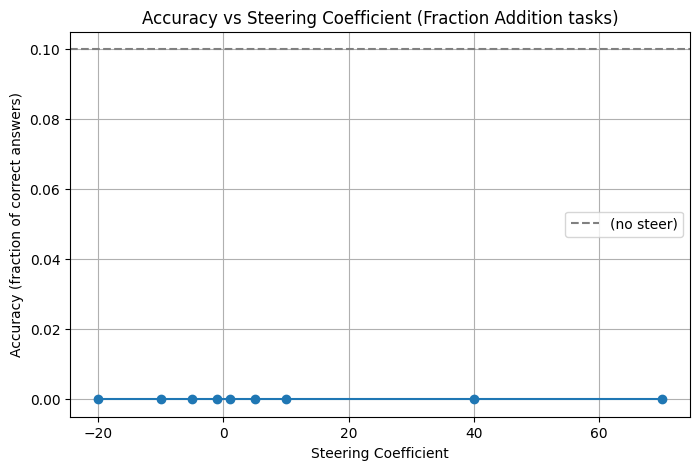

In [6]:
import matplotlib.pyplot as plt

base_accuracy = 0.1
coeffs = sorted(accuracy_by_coeff.keys())
accuracies = [accuracy_by_coeff[c] for c in coeffs]

plt.figure(figsize=(8, 5))
plt.plot(coeffs, accuracies, marker='o')
plt.title('Accuracy vs Steering Coefficient (Fraction Addition tasks)')
plt.xlabel('Steering Coefficient')
plt.ylabel('Accuracy (fraction of correct answers)')
plt.axhline(y=base_accuracy, color='gray', linestyle='--', label='(no steer)')
plt.legend()
plt.grid(True)
plt.show()